In [1]:
from src.adios2toolspy import SuperCell, Particles, Fields
from src.h5toolspy import getH5Grid, selectSubSpace
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 8]

## Full Grid B

## Pick Domain
y: point on x-axis, z: point on y-axis

Loading hx_fc from File: tfd.035000.xdmf


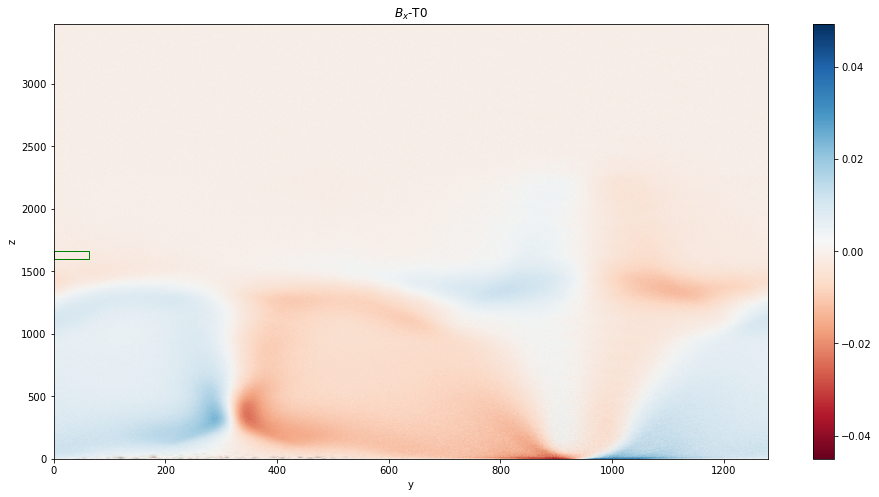

In [2]:
root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-SGII/double-res/'

globalDims = (1, 2*640, 3480)
corner = (1280, 0, 3840)
numPatches=2
cellsPerPatch=32

time = -1

bx = getH5Grid(root, 'tfd', 'hx_fc', time, corner=corner, dims=globalDims)[:,:,0]
plt.title(f'$B_x$-T{time+1}')
plt.ylabel('z')
plt.xlabel('y')
plt.pcolormesh(bx, cmap='RdBu', shading='gouraud')
plt.colorbar()
xp = 0
yp = 0
zp = 1600
box = selectSubSpace(yp, zp, numPatches=numPatches)

nbins = 100
histograms_e = []
bins_e = []

histograms_he = []
bins_he = []
patch = np.array(corner) + np.array((xp, yp, zp))

for time in range(1000, 13000,1000):
    path = root + 'checkpoint_' + str(time) + '.bp'
    SC = SuperCell(path, patch, patches=numPatches, species='electron')
    h = SC.histogramV(nbins, log=True, dim='s')
    histograms_e.append(h[0])
    bins_e.append(h[1][1:])
    
    SC_he = SuperCell(path, patch, patches=numPatches, species='electron_he')
    h_he = SC_he.histogramV(nbins, log=True, dim='s')
    histograms_he.append(h_he[0])
    bins_he.append(h_he[1][1:])


c = np.arange(1, len(histograms_e) + 1)
norm = matplotlib.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.jet)
cmap.set_array([])

fig, axes = plt.subplots(nrows=1, ncols=2)

for i in range(len(histograms_e)):
    axes[0].plot(bins_e[i], histograms_e[i], c=cmap.to_rgba(i + 1))
    axes[1].plot(bins_he[i], histograms_he[i], c=cmap.to_rgba(i + 1))

axes[0].set_title(f'$V^2$ e')
axes[0].set_ylabel('count')
axes[0].set_xlabel('$V^2$')
axes[0].set_yscale('log')
axes[1].set_title(f'$V^2$ he')
axes[1].set_ylabel('count')
axes[1].set_xlabel('$V^2$')
axes[1].set_yscale('log')
fig.colorbar(cmap, ticks=c)
#plt.savefig(f'hist-t{time}.png')



he_ratios = []
ion_ratios = []
for time in range(1000, 13000, 1000):
    path = root + 'checkpoint_' + str(time) + '.bp'
    #print(time)
    prts = Particles(path)
    df = []
    for z in range(-3200, 3200, 32):
        coord_ = corner + np.array([0, 0, z])
        patch_ = prts.getPatchMomentum(coord_, cellsPerPatch)
        df.append(patch_)
    
    residents_ = pd.concat(df, ignore_index=True)
    
    he_ratio = residents_[residents_['kind']==0].shape[0]/(residents_[residents_['kind']==0].shape[0] + residents_[residents_['kind']==1].shape[0])
    he_ratios.append(he_ratio)
    
    ion_ratio = residents_[residents_['kind']==2].shape[0]/(residents_[residents_['kind']==0].shape[0] +
                                                                     residents_[residents_['kind']==1].shape[0])
    ion_ratios.append(ion_ratio)


fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(he_ratios)
axes[1].plot(ion_ratios)
axes[0].set_title('he ratio')
axes[1].set_title('ion ratio')
plt.savefig('species_ratios.png')

Loading rho_e from File: tfd_moments.035040.xdmf


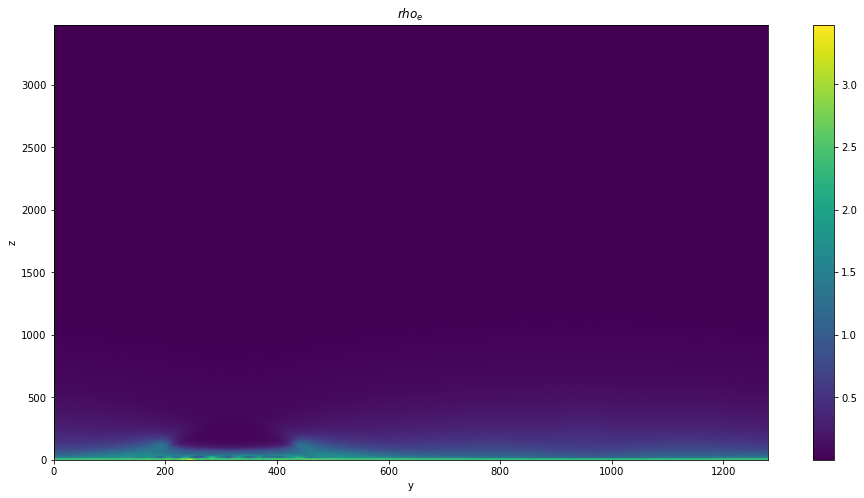

In [4]:

tt = -1
rho_e = -getH5Grid(root, 'tfd_moments', 'rho_e', tt, corner=corner, dims=globalDims)[:,:,0]
#rho_he_e = -getH5Grid(root, 'tfd_moments', 'rho_he_e', tt, corner=corner, dims=globalDims)[:,:,0]
#rho_i = getH5Grid(root, 'tfd_moments', 'rho_i', tt, corner=corner, dims=globalDims)[:,:,0]


plt.title(f'$rho_e$')
plt.ylabel('z')
plt.xlabel('y')
#plt.pcolormesh(rho_e + rho_he_e, clim=(-4,1))
plt.pcolormesh(rho_e)
plt.colorbar()


Loading txx_e from File: tfd_moments.035040.xdmf
Loading tyy_e from File: tfd_moments.035040.xdmf
Loading tzz_e from File: tfd_moments.035040.xdmf


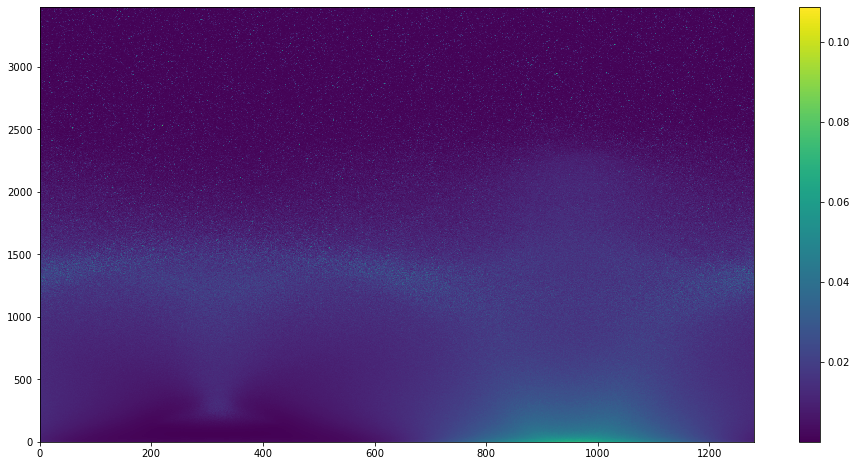

In [5]:
Txxe = getH5Grid(root, 'tfd_moments', 'txx_e', tt, corner=corner, dims=globalDims)[:,:,0]
Tyye = getH5Grid(root, 'tfd_moments', 'tyy_e', tt, corner=corner, dims=globalDims)[:,:,0]
Tzze = getH5Grid(root, 'tfd_moments', 'tzz_e', tt, corner=corner, dims=globalDims)[:,:,0]
trace = (Txxe + Tyye + Tzze)/(rho_e)/3
plt.pcolormesh(trace)
plt.colorbar()
plt.savefig('electron-temp-3d-time-0.png')

Loading rho_e from File: tfd_moments.000000.xdmf
Loading rho_e from File: tfd_moments.035040.xdmf


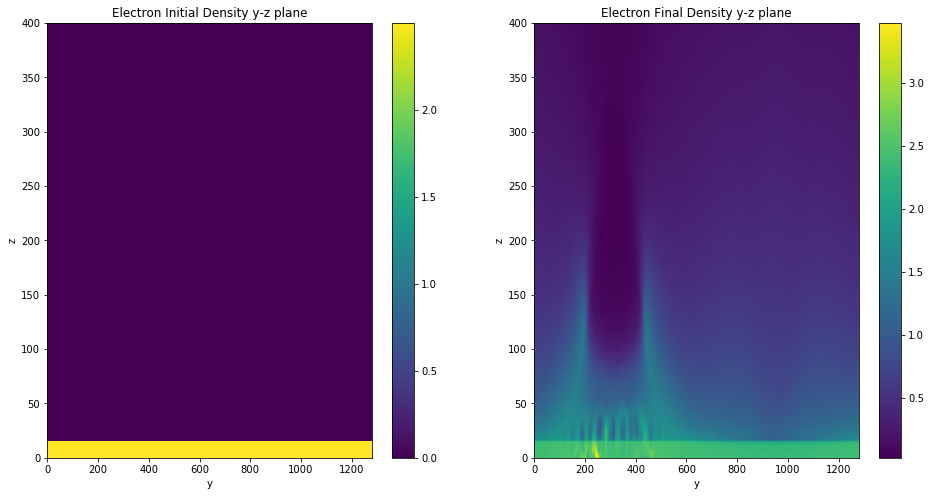

In [24]:
tt0 = 0
tt1 = -1
partialDims = (1, 2*640, 500)
rho_e0 = -getH5Grid(root, 'tfd_moments', 'rho_e', tt0, corner=corner, dims=partialDims)[:,:,0]
rho_e1 = -getH5Grid(root, 'tfd_moments', 'rho_e', tt1, corner=corner, dims=partialDims)[:,:,0]
fig, axes = plt.subplots(1,2)
pcm1=axes[0].pcolormesh(rho_e0)
pcm2=axes[1].pcolormesh(rho_e1)
axes[0].set_title('Electron Initial Density y-z plane')
axes[1].set_title('Electron Final Density y-z plane')
fig.colorbar(pcm1, ax=axes[0])
fig.colorbar(pcm2, ax=axes[1])
for i in range(2):
    axes[i].set_ylim(0,400)
    axes[i].set_ylabel('z')
    axes[i].set_xlabel('y')
plt.savefig('electron-3d-density.png')

Loading hx_fc from File: tfd.001000.xdmf
Loading hy_fc from File: tfd.001000.xdmf
Loading hx_fc from File: tfd.035000.xdmf
Loading hy_fc from File: tfd.035000.xdmf


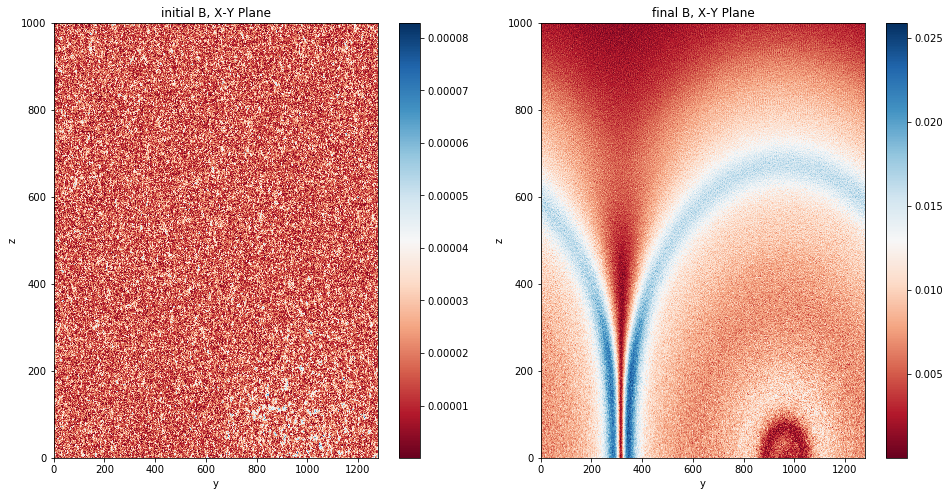

In [36]:
xycorner = (1280, 0, 3480)
xypartialDims = (1000, 2*640, 1)

bx0 = getH5Grid(root, 'tfd', 'hx_fc', tt0, corner=xycorner, dims=xypartialDims)[0,:,:].T
by0 = getH5Grid(root, 'tfd', 'hy_fc', tt0, corner=xycorner, dims=xypartialDims)[0,:,:].T
bx1 = getH5Grid(root, 'tfd', 'hx_fc', tt1, corner=xycorner, dims=xypartialDims)[0,:,:].T
by1 = getH5Grid(root, 'tfd', 'hy_fc', tt1, corner=xycorner, dims=xypartialDims)[0,:,:].T
fig, axes = plt.subplots(1,2)
pcm1=axes[0].pcolormesh(np.sqrt(bx0**2 + by0**2), cmap='RdBu')
pcm2=axes[1].pcolormesh(np.sqrt(bx1**2 + by1**2), cmap='RdBu')
axes[0].set_title('initial B, X-Y Plane')
axes[1].set_title('final B, X-Y Plane')
fig.colorbar(pcm1, ax=axes[0])
fig.colorbar(pcm2, ax=axes[1])
for i in range(2):
    #axes[i].set_ylim(0,400)
    axes[i].set_ylabel('z')
    axes[i].set_xlabel('y')
plt.savefig('bfield-xy.png')

Px = getH5Grid(root, 'tfd_moments', 'px_he_e', time, corner=patch, dims=globalDims)#(box, box, box))
rho = -getH5Grid(root, 'tfd_moments', 'rho_he_e', time, corner=corner, dims=globalDims)#(box, box, box))
plt.pcolormesh(Txx, shading='gouraud')
rhoMean = np.mean(rho)
TxxMean = np.mean(Txx/rho)
PxMean = np.mean(Px)

vSqrMoment = Txx[:,:,0]/rho[:,:,0]

plt.title('$V_e^2$')
plt.imshow(np.log10(rho[:,:,0]), origin='lower')
plt.colorbar()
print(TxxMean)

In [ ]:
plt.title('$V_e^2$')
plt.plot(rho[:,1000,0])


## |V| Histogram

tcheck = '1000'

path = root + 'checkpoint_' + tcheck + '.bp'
patch = np.array(corner) + np.array((xp, yp, zp))
SC = SuperCell(path, patch, patches=numPatches, species='electron_he')
#print('temp', 1/TxxMean)

bins = 500
h = SC.histogramV(bins, log=True, dim='s')
plt.plot(h[1][1:], h[0])
plt.ylabel('count')
plt.xlabel('$|V|^2$')
plt.yscale('log')
plt.title(f'xp-{xp}-yp-{yp}-zp-{zp}-t{tcheck}')
#plt.savefig(f'histVsqr-xp-{xp}-yp-{yp}-zp-{zp+320}-t{tcheck}.png')

## grid histograms

bins = 300
for time in range(1000, 60000,1000):
    path = root + 'checkpoint_' + str(time) + '.bp'
    fig, axes = plt.subplots(nrows=nr, ncols=nc)
    for i in range(nr):
        for j in range(nc):
            patch = np.array(corner) + np.array((0, 192 + 96*i, 192 + 96*j))
            SC = SuperCell(path, patch, patches=numPatches, species='electron')
            h = SC.histogramV(bins, log=True, dim='s')
            axes[i,j].plot(h[1][1:], h[0])

            axes[i,j].set_title(f'$V^2$-T{time}')
            axes[i,j].set_ylabel('count')
            axes[i,j].set_xlabel('$V^2$')
            axes[i,j].set_yscale('log')
    plt.tight_layout()
    plt.savefig(f'hist-t{time}.png')
    plt.close()


## Fit
from scipy.optimize import curve_fit

def logarithmic_line(x, m, b):
    return np.exp(b)*np.exp(-x*m)
    
#hh = h[1]**0.5*np.exp(-h[1]/(0.8*TxxMean*2))*2e4
#hh = h[1]**0.5*np.exp(-h[1]/(0.006*2))*2.5e4
#plt.plot(h[1], hh, '-m',label='fake maxwellian' )
def straight_line(x, m, b):
    return -m*x+b

l1, r1 = 5, 30
l2, r2 = 50, 200
popt1, pcov1 = curve_fit( straight_line, h[1][ l1  : r1], np.log(h[0][l1 : r1] + 1e-5) )
popt2, pcov2 = curve_fit( straight_line, h[1][ l2  : r2], np.log(h[0][l2 : r2] + 1e-5) )


dummyline = np.arange(0,0.6,0.01)
#dummyline2 = np.arange(0.1, 0.3, 0.01)
plt.plot(dummyline, logarithmic_line(dummyline, *popt1), '-r', label=f'{popt1[0]:.2f}x+{popt1[1]:.2f}')
plt.plot(dummyline, logarithmic_line(dummyline, *popt2), '-b', label=f'{popt2[0]:.2f}x+{popt2[1]:.2f}')

plt.plot(h[1][1:],h[0], '+g', label='data')
plt.vlines((h[1][l1],h[1][r1]), ymin=1e0, ymax=3e5, color='r', linestyles='dashed', label='fit region red')
plt.vlines((h[1][l2],h[1][r2]), ymin=1e0, ymax=3e3, color='b', linestyles='dashed', label='fit region blue')
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('$|V|^2$')
plt.title(f'xp-{xp}-yp-{yp}-zp-{zp+320}-t{tcheck}')
plt.legend()
#plt.savefig(f'Maxwellian-xp-{xp}-yp-{yp}-zp-{zp+320}-t{tcheck}.png')

## process to gif
import imageio
import os
image_folder = '.'#'images_tmp/yzplane'

images = [image_folder + '/' +  img for img in os.listdir(image_folder) if img.endswith(".png")]

images = sorted(images, key=lambda x: int(x.split('-t')[1].split('.')[0]))

image_data = []
for image in images:
    image_data.append(imageio.imread(image))
imageio.mimwrite('baseline-rho-he-negative-log.gif', image_data, format= '.gif', fps = 1)



In [45]:
mem0DF = pd.read_csv('/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-1/memTest3dLog/rmm_logs_0.csv')
mem1DF = pd.read_csv('/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-1/memTest3dLog/rmm_logs_1.csv')
mem2DF = pd.read_csv('/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-1/memTest3dLog/rmm_logs_2.csv')
mem3DF = pd.read_csv('/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-1/memTest3dLog/rmm_logs_3.csv')
mem4DF = pd.read_csv('/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-1/memTest3dLog/rmm_logs_4.csv')
mem5DF = pd.read_csv('/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-1/memTest3dLog/rmm_logs_5.csv')

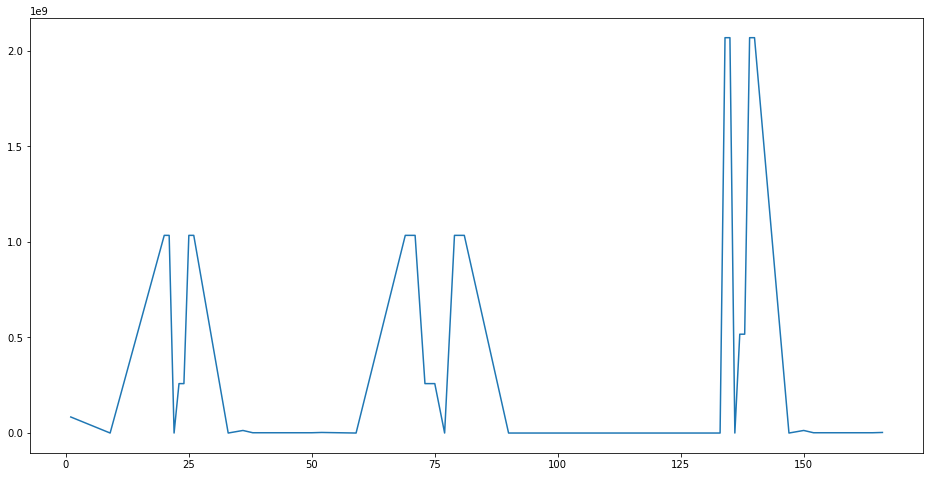

In [55]:
mem2DF[mem2DF['Action']=='free']['Size'].plot()

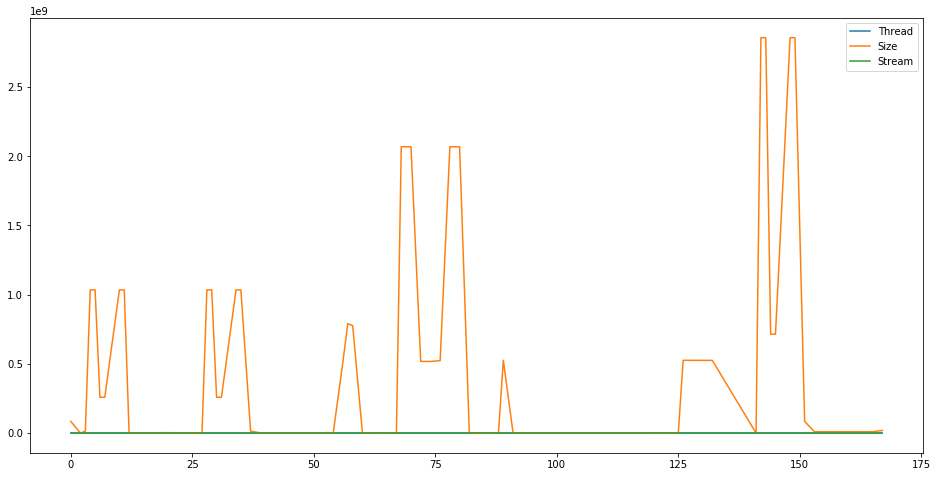

In [50]:
mem2DF[mem2DF['Action']=='allocate'].plot()

In [53]:
mem2DF.loc[150:]

,Thread,Time,Action,Pointer,Size,Stream
150,10273,09:18:48:747072,free,0x20033dc00000,13436928,0
151,10273,09:18:48:749619,allocate,0x200a8a600000,83980800,0
152,10273,09:18:48:851384,free,0x200072004200,1492992,0
153,10273,09:18:48:852280,allocate,0x200a8f800000,9331200,0
154,10273,09:18:48:898675,free,0x20033ea00000,1492992,0
155,10273,09:18:48:899541,allocate,0x200a90200000,9331200,0
156,10273,09:18:48:932543,free,0x20033ec00000,1492992,0
157,10273,09:18:48:933397,allocate,0x200a90c00000,9331200,0
158,10273,09:18:48:969655,free,0x20033ee00000,1492992,0
159,10273,09:18:48:970568,allocate,0x200a91600000,9331200,0


In [38]:
mem0DF = mem0DF[mem0DF['Action']=='allocate']
mem1DF = mem1DF[mem1DF['Action']=='allocate']
mem2DF = mem2DF[mem2DF['Action']=='allocate']
mem3DF = mem3DF[mem3DF['Action']=='allocate']
mem4DF = mem4DF[mem4DF['Action']=='allocate']
mem5DF = mem5DF[mem5DF['Action']=='allocate']

In [39]:
desc = pd.concat([mem0DF['Size'].describe(), 
           mem1DF['Size'].describe(),
           mem2DF['Size'].describe(),
           mem3DF['Size'].describe(),
           mem4DF['Size'].describe(),
           mem5DF['Size'].describe()], axis=1)
desc.columns = (0,1,2,3,4,5)
desc

,0,1,2,3,4,5
count,1.080000e+02,1.080000e+02,1.190000e+02,1.190000e+02,1.080000e+02,1.080000e+02
mean,2.245912e+08,2.579875e+08,3.341222e+08,3.355935e+08,2.595421e+08,2.211691e+08
std,4.330046e+08,5.117996e+08,6.679907e+08,6.699387e+08,5.155338e+08,4.260199e+08
min,1.024080e+05,2.868000e+04,1.639200e+04,1.639200e+04,2.868000e+04,1.024080e+05
25%,7.818240e+05,8.924160e+05,6.082560e+05,6.082560e+05,8.924160e+05,7.818240e+05
50%,2.005018e+07,2.612736e+06,1.492992e+06,1.492992e+06,2.612736e+06,2.005018e+07
75%,2.416650e+08,2.833675e+08,5.171260e+08,5.205721e+08,2.857849e+08,2.380199e+08
max,1.874707e+09,2.266940e+09,2.856425e+09,2.856895e+09,2.286279e+09,1.841500e+09
